Table of contents
<a id='tof'></a>
---
[Turkey](#Turkey)  
[Romania](#Romania)  
[Switzerland](#Switzerland)  
[Iceland](#Iceland)  
[New Zealand](#New-Zealand)  
[Greece](#Greece)  
[California](#California)

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import json
from scipy.stats import scoreatpercentile
from overview_maps_reakt import main as delaymap
from magnitude_comparison import MagComp
from optimal_blindzone import plot_bz
import sys
sys.path.append('../reports')
from point_in_polygon import EventSoCal, EventCA

def plot_data_delays(data, fout=None, networks=['*'],
                     lineplot=False, xlabel='Pick delays [s]',
                     llabel='', xmin=None, xmax=None, ax=None,
                     color='k',cumulative=False):
    try:
        fh = open(data)
        pkdel = json.load(fh)
        fh.close()
        delays = {}
        for _k in pkdel:
            net,sta = _k.split('.')
            if net not in networks and '*' not in networks:
                continue
            if net not in delays:
                delays[net] = pkdel[_k]
            else:
                delays[net] += pkdel[_k]
    except:
        delays = data
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111)
    if lineplot:
        all_delays = []
        for _n in delays.keys():
            all_delays += delays[_n]
        n, bins, patches = ax.hist(all_delays,bins=np.arange(0, 20,1.0),
                               histtype='step', color=color,
                               rwidth=1.0, normed=True,label=llabel,
                               cumulative=cumulative)
    else:
        n, bins, patches = ax.hist([delays[_n] for _n in delays.keys()],
                                   bins=np.arange(-30, 30,1.0),
                                   histtype='barstacked',
                                   label=[_n for _n in delays.keys()],
                                   rwidth=1.0)

        ax.set_xlabel(xlabel)
        ax.legend()
    if xmin is not None and xmax is not None:
        ax.set_xlim(xmin,xmax)
    if fout is not None:
        plt.savefig(fout, dpi=300)

def plot_origin_creation_time(fin,fout=None):
    a = np.load(fin)
    delays_ct = a['delays']
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    n, bins, patches = ax1.hist(delays_ct, bins=np.arange(-30, 30, 1.0),
                                color='blue', rwidth=1.0)
    med = np.median(delays_ct)
    percentile16 = scoreatpercentile(delays_ct, 16)
    percentile84 = scoreatpercentile(delays_ct, 84)
    ax1.text(0.6, 0.7, 'Median: %.1f s' % (med), horizontalalignment='left',
            transform=ax1.transAxes, color='blue')
    ax1.text(0.6, 0.65, '16th percentile: %.1f s' % (percentile16), horizontalalignment='left',
            transform=ax1.transAxes, color='blue')
    ax1.text(0.6, 0.6, '84th percentile: %.1f s' % (percentile84), horizontalalignment='left',
            transform=ax1.transAxes, color='blue')
    ax1.set_xlabel('Event declaration time [s]')
    if fout is not None:
        plt.savefig(fout, dpi=300)

/usr/lib/pymodules/python2.7/matplotlib/__init__.py:1173: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


### Pick delay comparison

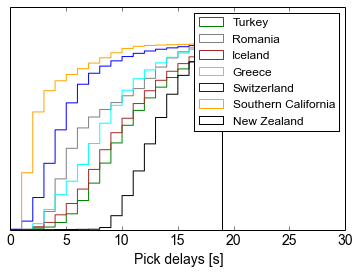

In [18]:
fns = {'Turkey':('./data/pick_delays_tr.txt','green'), 
       'Switzerland':('./data/pick_delays_ch.txt','blue'),
       'Southern California':('./data/pick_delays_ca.txt','orange'),
       'Greece':('./data/pick_delays_gr.txt','cyan'),
       'New Zealand':('./data/pick_delays_nz.txt','black'),
       'Iceland':('./data/pick_delays_is.txt','brown'),
       'Romania':('./data/pick_delays_ro.txt','grey')}
fig = plt.figure()
ax = fig.add_subplot(111)
if True:
    for _k,_e in fns.iteritems():
        _fn,_cl = _e
        plot_data_delays(_fn, lineplot=True,llabel=_k, 
                         xmin=0, xmax=30, ax=ax, color=_cl,
                         cumulative=True)
    ax.legend(loc='upper right')
    ax.set_xlabel('Pick delays [s]')
    ax.set_yticks([])
if False:
    data = {}
    for _k,_e in fns.iteritems():
        _fn,_cl = _e
        fh = open(_fn)
        pkdel = json.load(fh)
        fh.close()
        for _nst,_del in pkdel.iteritems():
            if _k not in data:
                data[_k] = pkdel[_nst]
            else:
                data[_k] += pkdel[_nst]
    plot_data_delays(data,xmin=0, xmax=30, ax=ax)
    

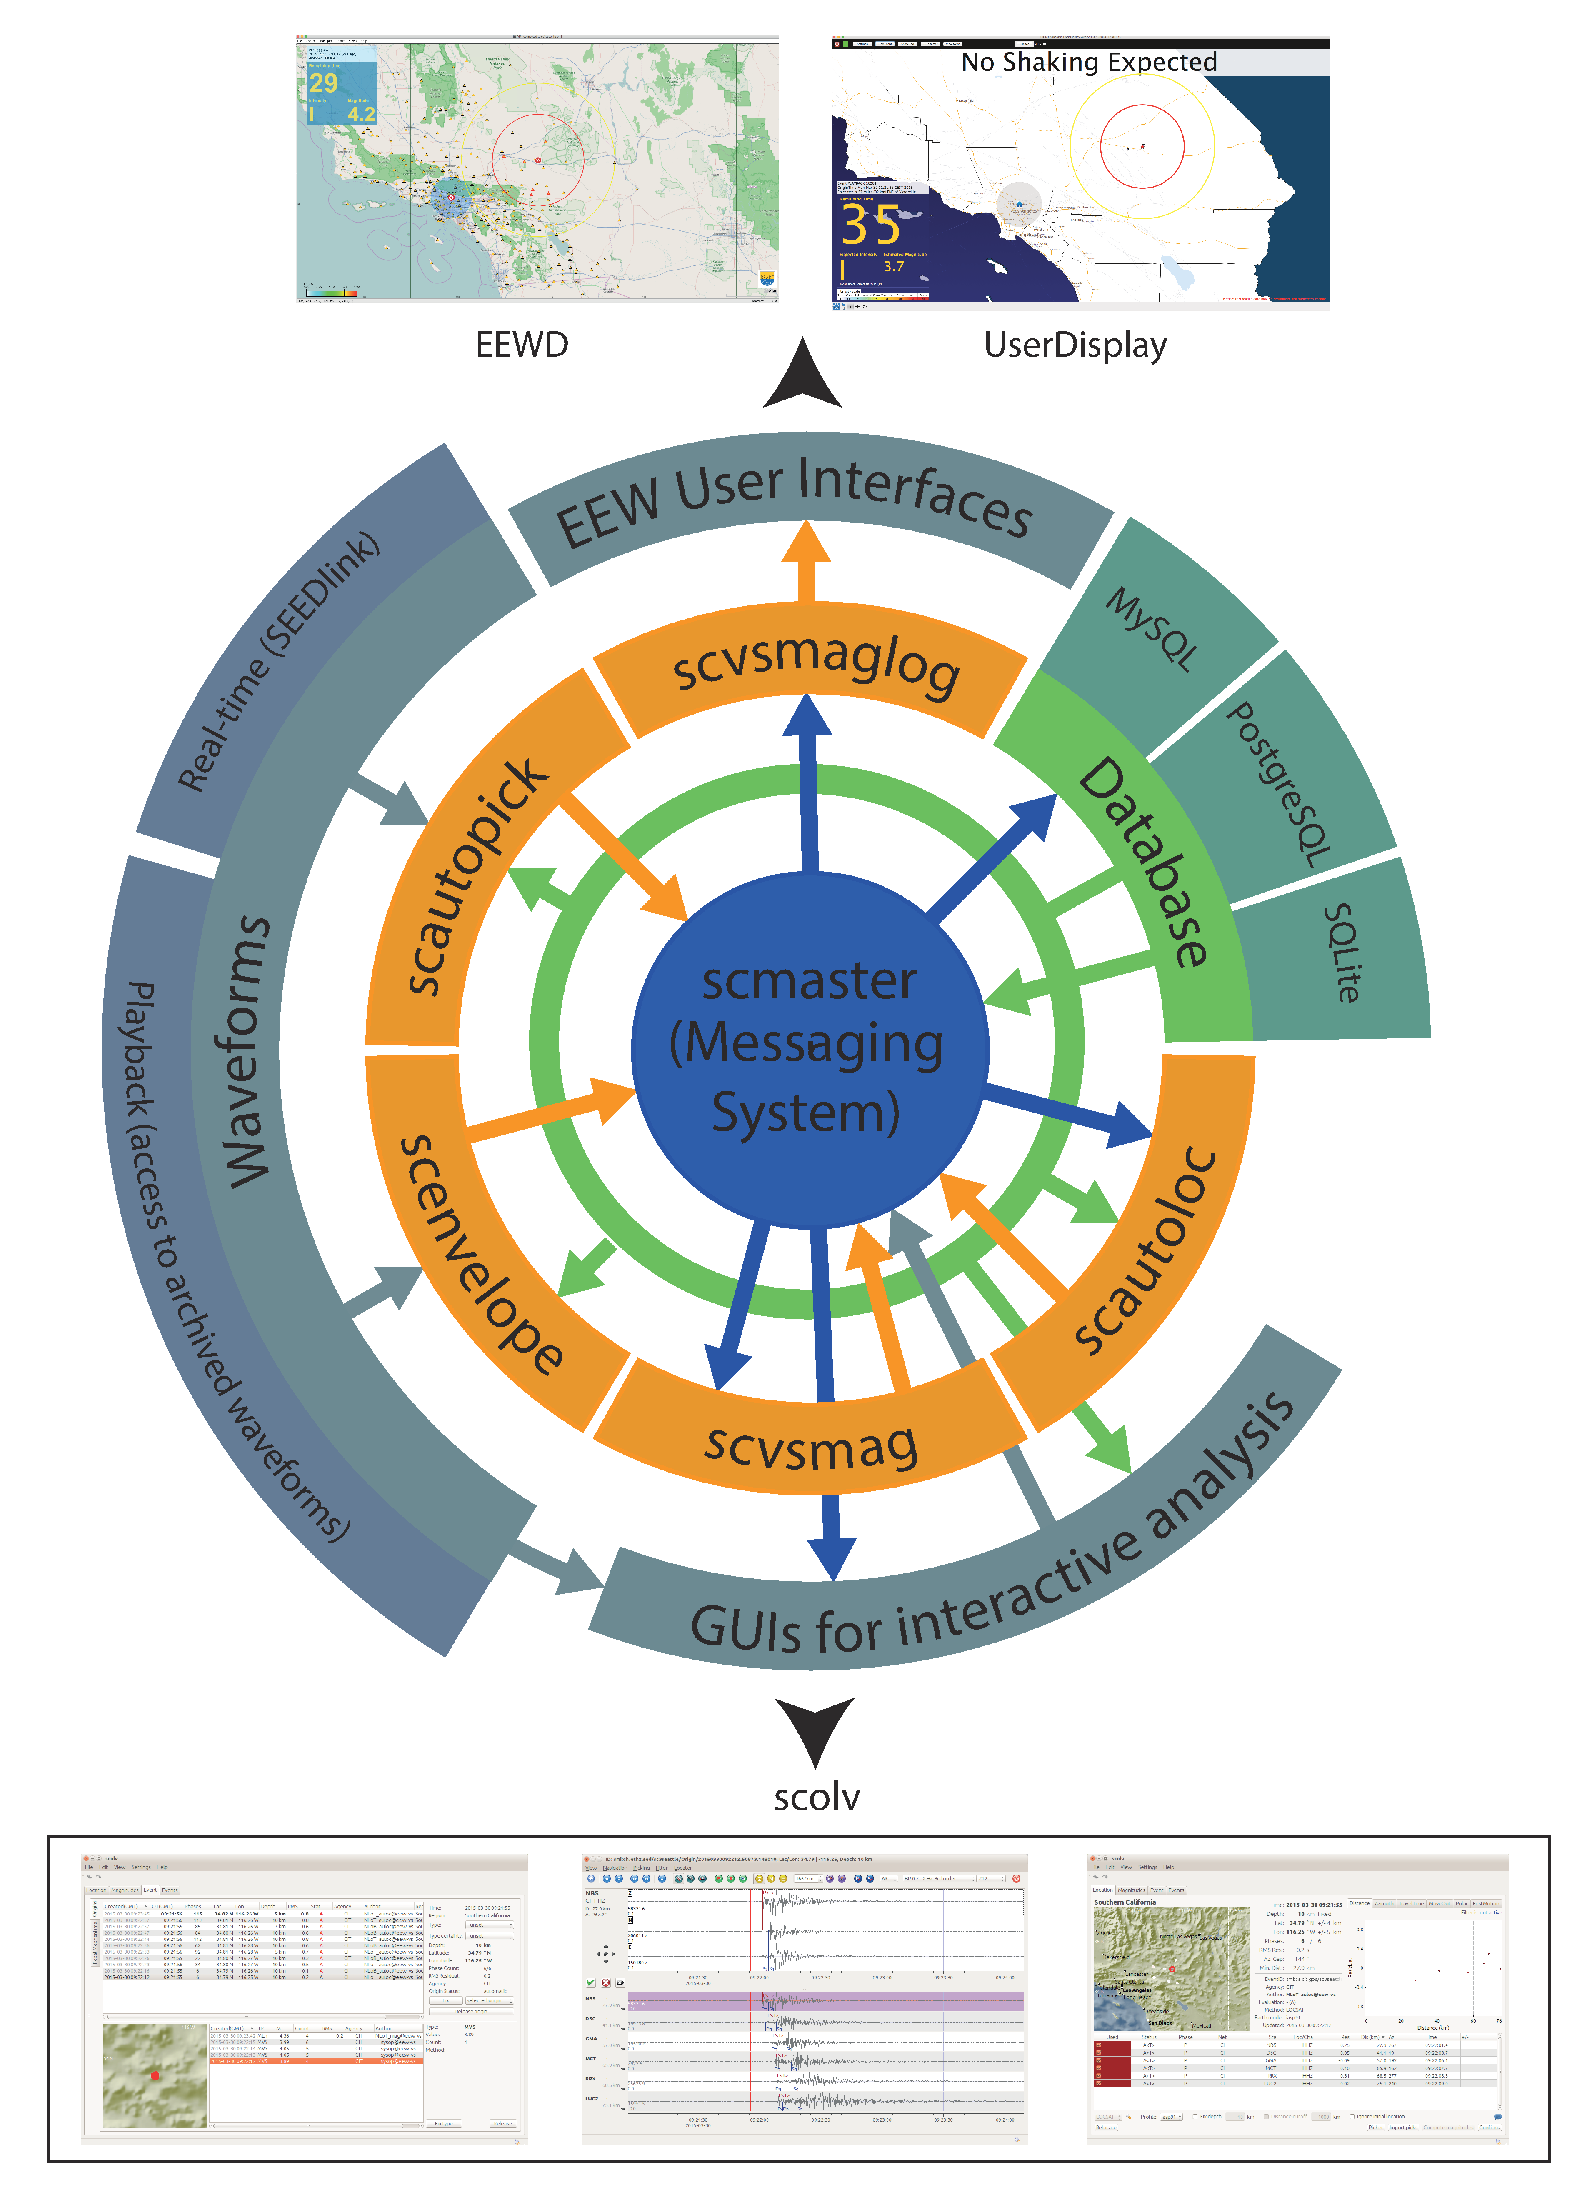

In [2]:
Image(filename='./VS_system_architecture_v1.2.png')

Number of events: 3211
Earliest event: 2009-01-04T15:30:30.000000Z
Latest event: 2015-05-31T15:27:42.250000Z
Smallest magnitude: 2.40
Largest magnitude: 6.20
Number of events: 3211
Earliest event: 2009-01-04T15:30:30.000000Z
Latest event: 2015-05-31T15:27:42.250000Z
Smallest magnitude: 2.00
Largest magnitude: 6.80


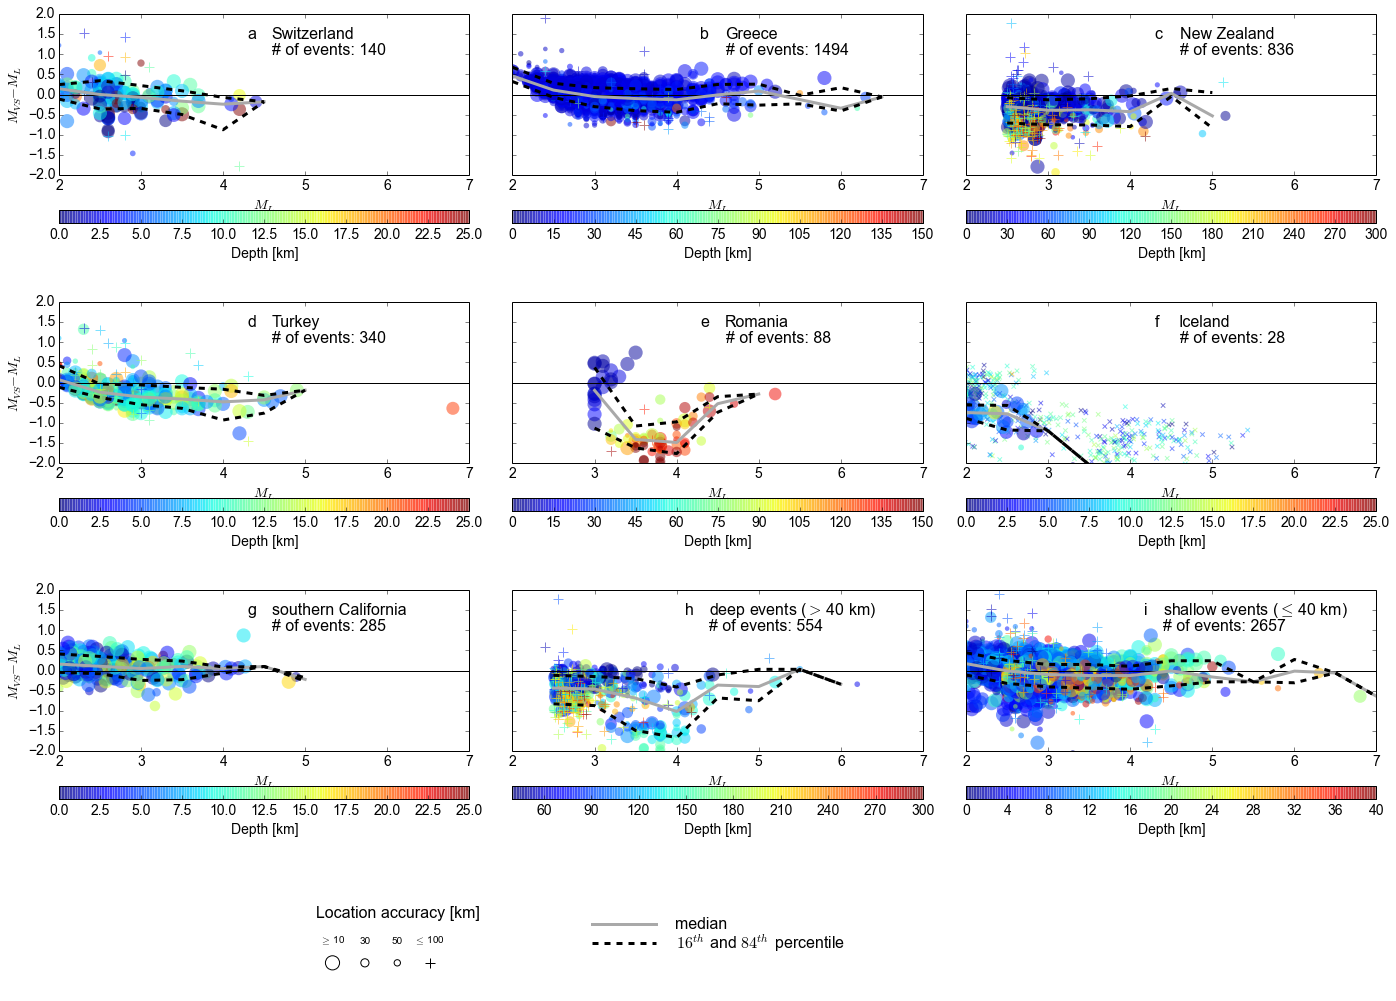

In [4]:
fout = './plots/mag_comp.png'
mc = MagComp()
mc.setup()
mc.plot(fout)

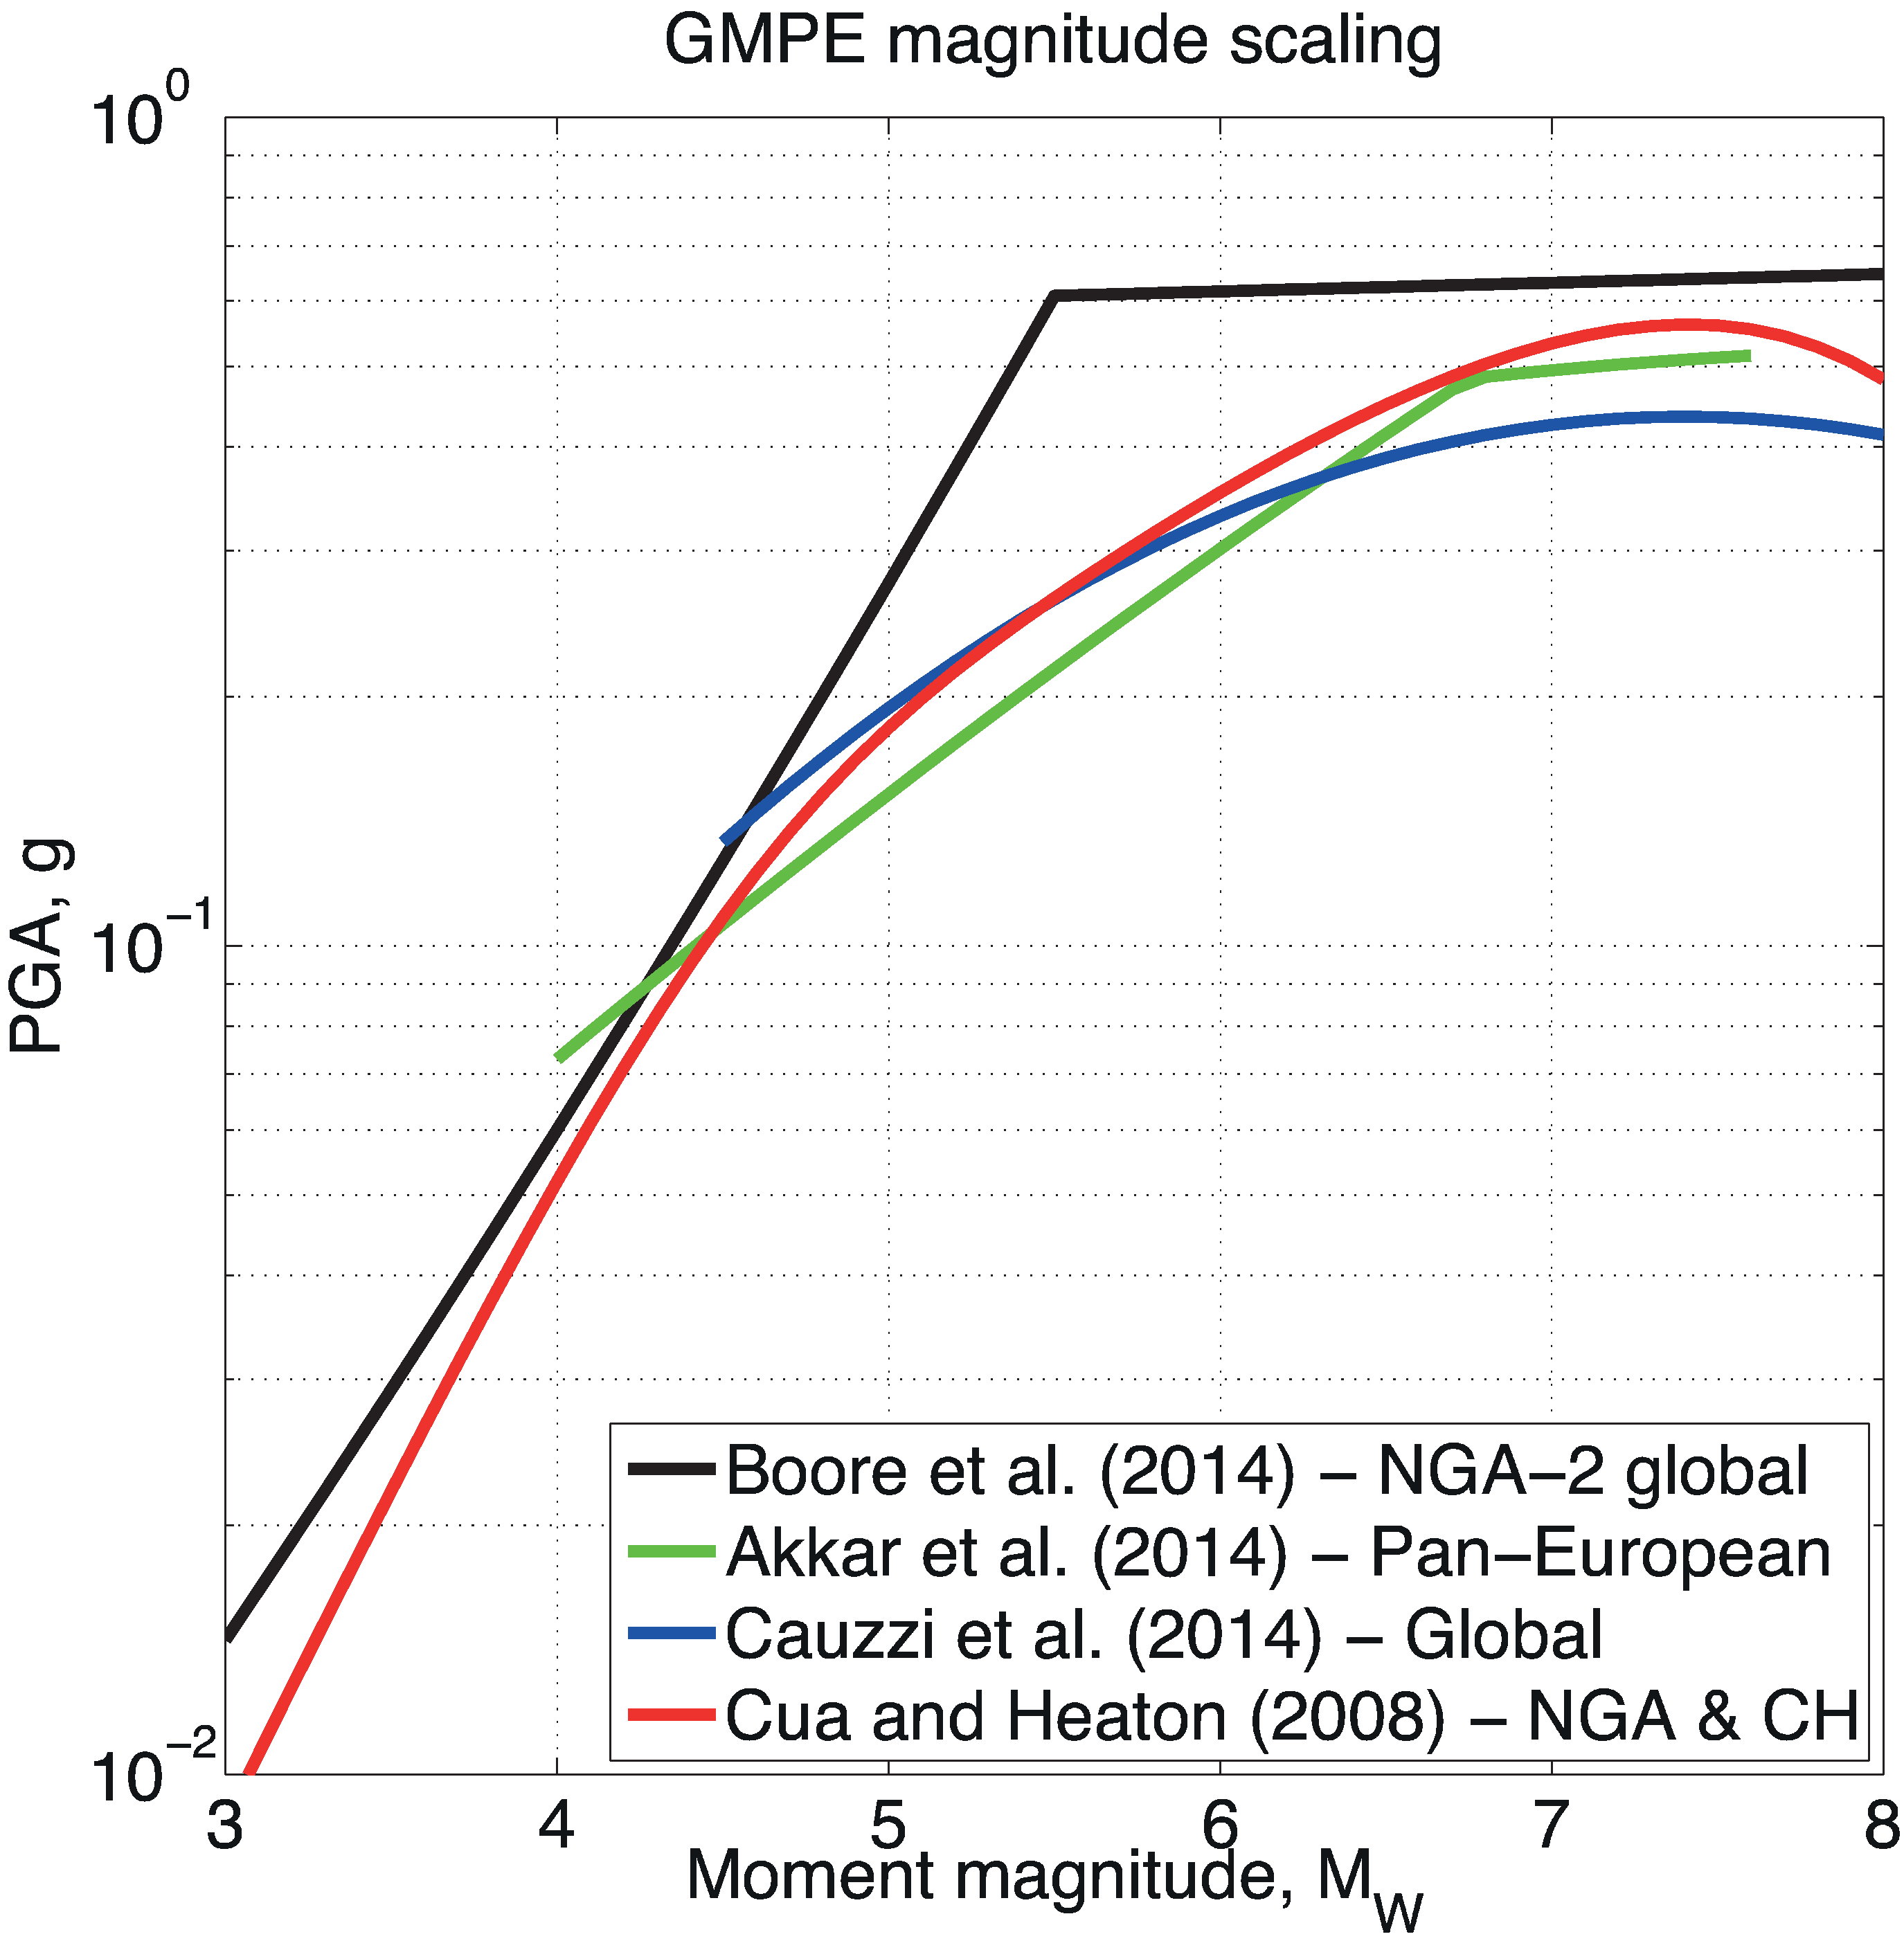

In [3]:
Image(filename='/home/behry/workspace/eew/reakt_publication/plots/scale_M.png')

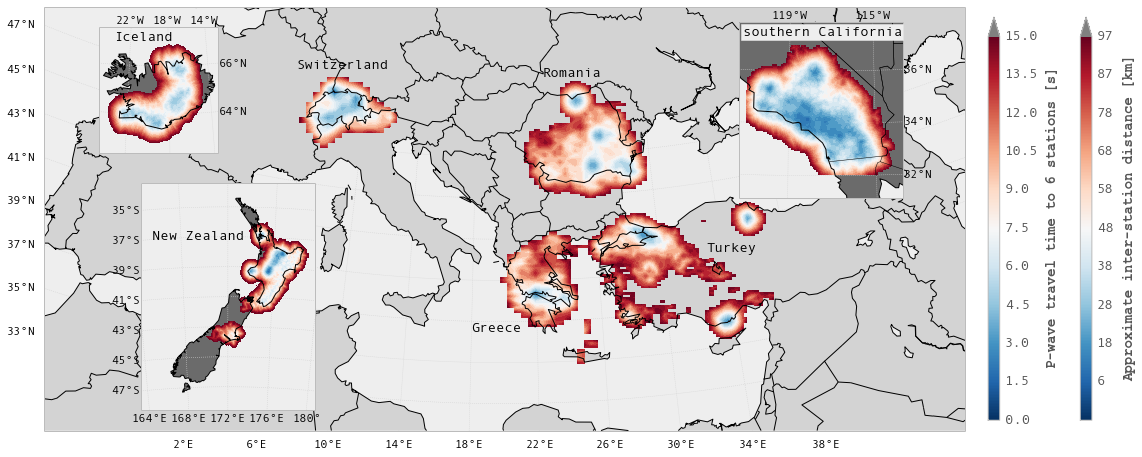

In [9]:
delaymap(traveltime=True)

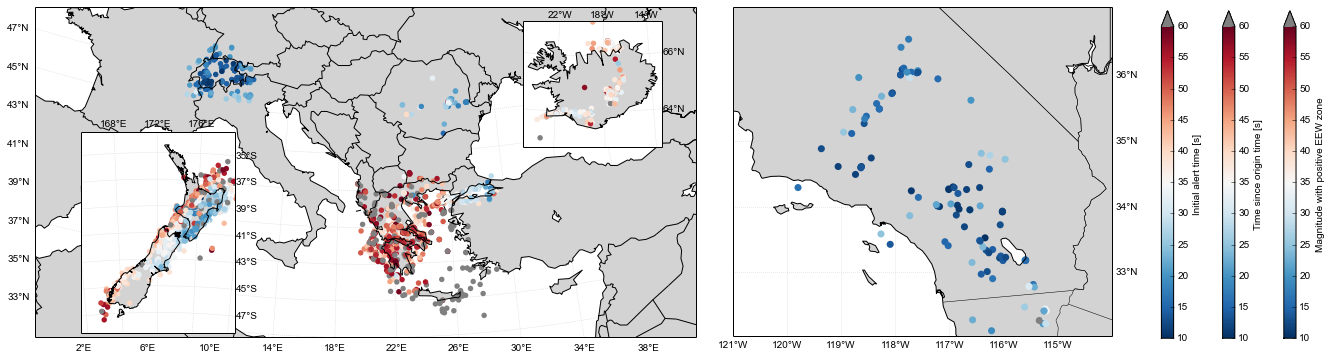

In [13]:
delaymap(alerttime=True)

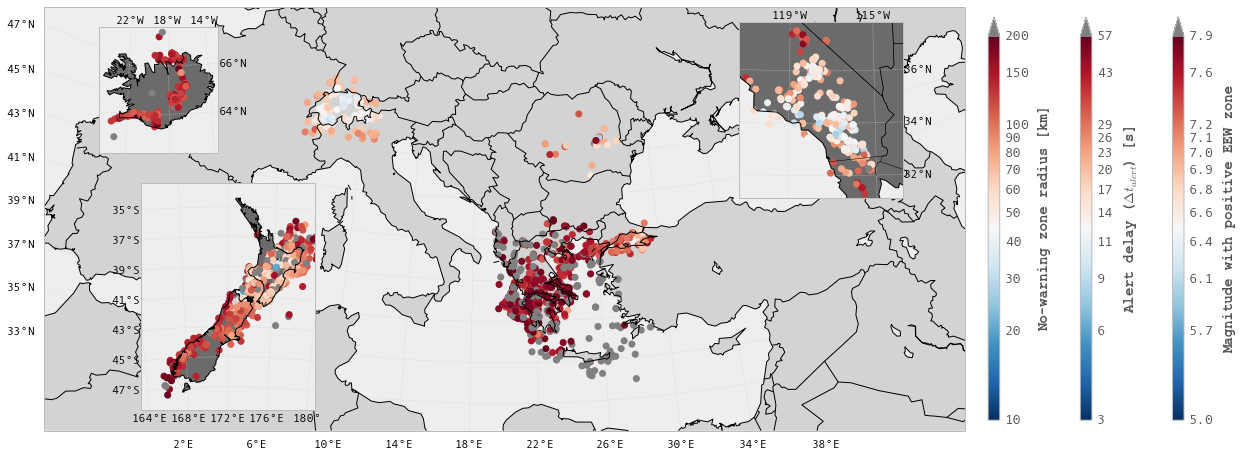

In [2]:
delaymap(blindzone=True)

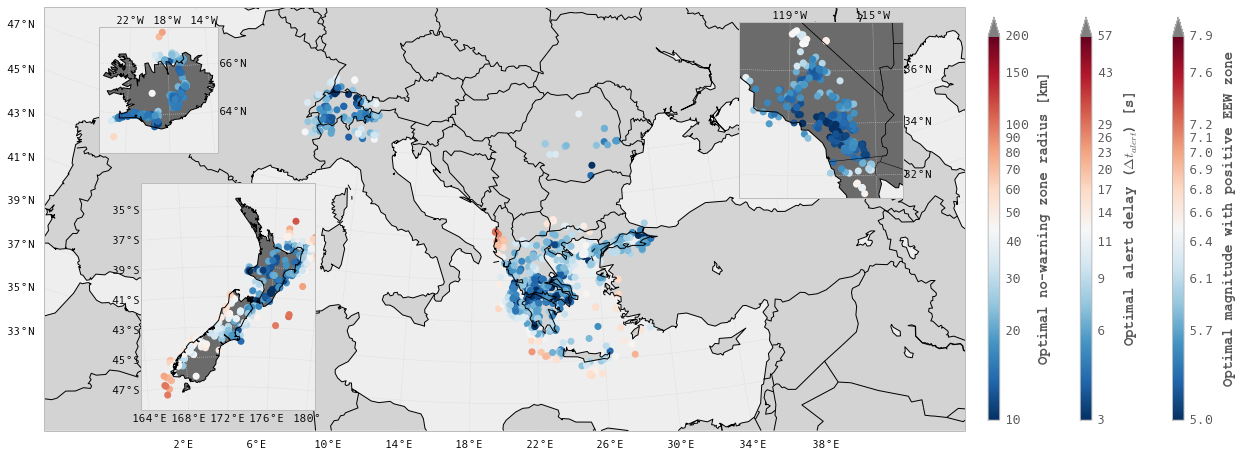

In [3]:
delaymap(optimalbz=True)

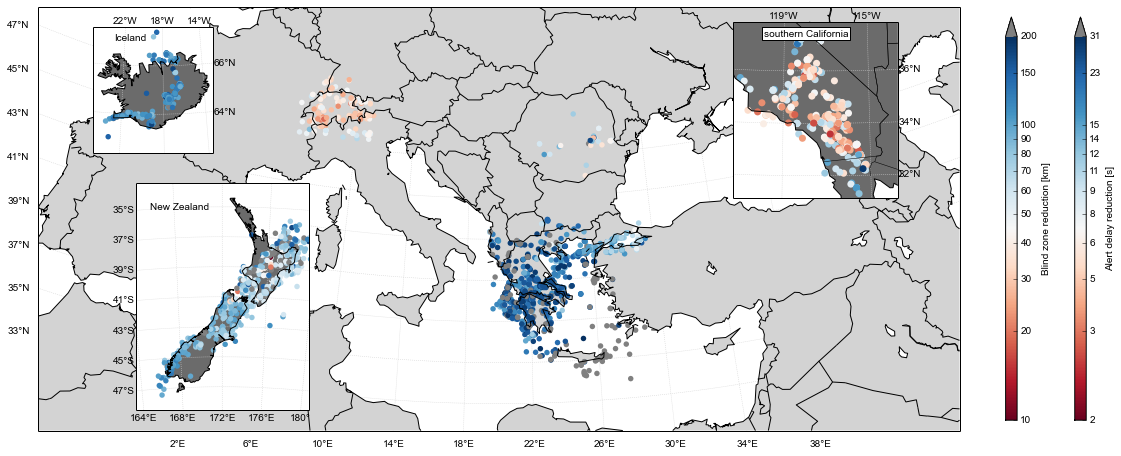

In [55]:
delaymap(bzreduction=True)

---

## Turkey

### Pick delays

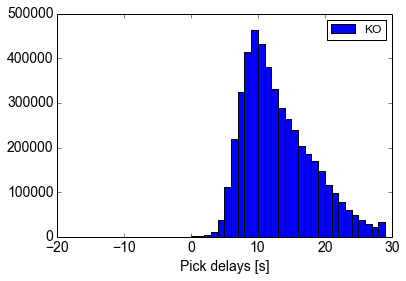

In [44]:
if False:
    # Pick delay analysis for Turkey (currently not working! check with Mustafa)
    #ssh -N -L 9997:localhost:3306 -l sysop 193.140.203.64  (tesla700%)
    #%run ../delays/sc3vs_pick_delays.py --host 127.0.0.1 -u sysop \
    #-p sysop --port 9997 -d seiscomp3 --dbtype mysql --new \
    #-o /tmp/single_station_pk_delays_koeri.txt \
    #--plotfile=/tmp/single_station_pk_delays_koeri.png
    pass
else:
    fin = './data/pick_delays_tr.txt'
    plot_data_delays(fin,networks=['KO'])

### Envelope delays

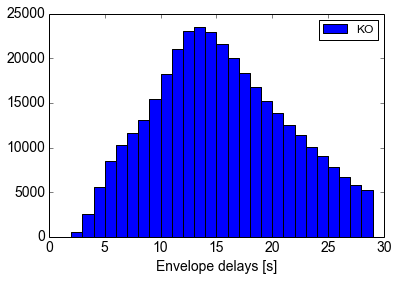

In [46]:
fin = './data/env_delays_tr.txt'
plot_data_delays(fin,label='Envelope delays [s]',networks=['KO'])

### Origin creation time

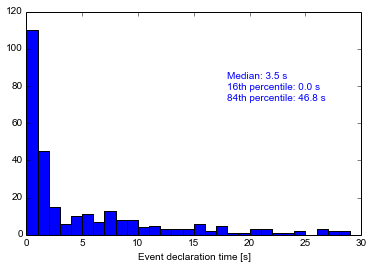

In [20]:
fin = './data/origin_creation_time_koeri.npz'
plot_origin_creation_time(fin,fout=None)

### Optimal blind zone

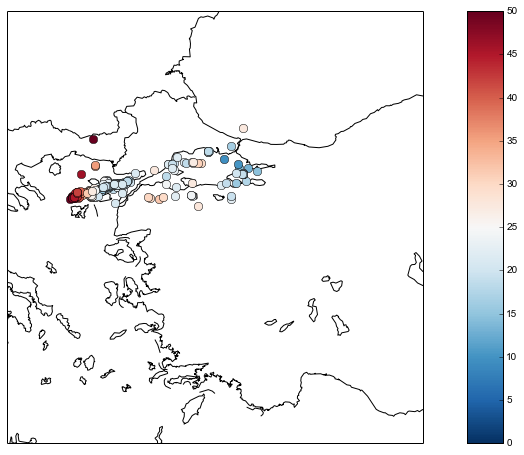

In [10]:
eventsfn = './data/event_list_turkey.csv'
stationsfn = './data/stations_tr.txt'
fout = './data/optimal_blindzone_tr.npz'
plot_bz(events=eventsfn,stations=stationsfn,vmin=0,vmax=50,new=False,
        fout=fout,mapbnd=(35.5, 43.5, 23.5, 33.5, 37.5))

## Romania

### Pick delays

In the beginning the server running SC3 in Romania wasn't using ntp which produced negative delays (picks arrived before they were detected :-)). For the timespan chosen below, this problem seems to be solved for all except one or two networks.

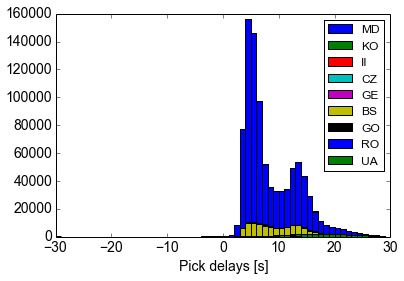

In [18]:
if False:
    # Pick delay analysis for Romania
    # ssh -N -L 9998:localhost:3306 -l sysop 91.212.254.9 (sysop)
    %run ../../vssc3_scripts/vssc3_pick_delays.py --host 127.0.0.1 \
    -u sysop -p sysop --port 9998 -d seiscomp3 --dbtype mysql --new \
    -o /tmp/single_station_pk_delays_ro.txt --plotfile=/tmp/single_station_pk_delays_ro.png \
    --start "2014-06-01T00:00:00" --end "2015-06-01T00:00:00"
else:
    fin = './data/pick_delays_ro.txt'
    plot_data_delays(fin)

### Envelope delays

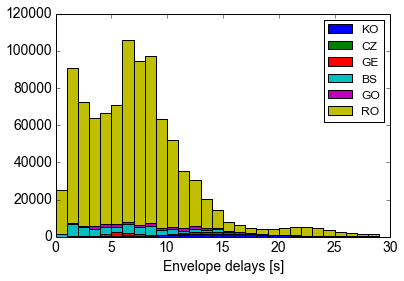

In [47]:
fin = './data/env_delays_ro.txt'
plot_data_delays(fin,label='Envelope delays [s]')

### Origin creation time

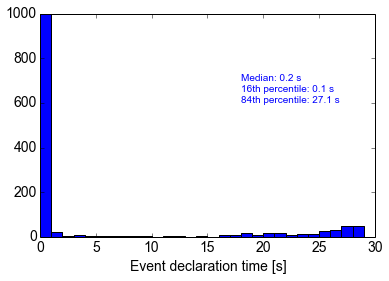

In [20]:
if False:
    # Origin creation time Romania
    %run ../delays/vssc3_origin_creation_time.py --host 127.0.0.1 \
     -u sysop -p sysop --port 9998 -d seiscomp3 \
     --dbtype mysql --new -o ./data/origin_creation_time_ro.npz \
     --plotfile=./data/origin_creation_time_ro.png
else:
    fin = './data/origin_creation_time_ro.npz'
    plot_origin_creation_time(fin)

### Simulated alert times

No envelope delay data available for the following stations:
RO.sta77 RO.sta107 RO.sta100 RO.sta59 RO.sta99 RO.sta44 RO.sta114 RO.sta139 RO.sta137 RO.sta4 RO.sta15 RO.sta10 RO.sta43 RO.sta51 RO.sta58 RO.sta5 RO.sta11 RO.sta17 RO.sta33 RO.sta19 RO.sta71 RO.sta93 RO.sta67 RO.sta90 RO.sta70 RO.sta92 RO.sta89 RO.sta95 RO.sta88 RO.sta69 RO.sta123 RO.sta68 RO.sta91 RO.sta82 RO.sta57 RO.sta84 RO.sta85 RO.sta117 RO.sta132 RO.sta115 RO.sta86 RO.sta73 RO.sta128 RO.sta104 RO.sta116 RO.sta83 RO.sta79 RO.sta56 RO.sta49 RO.sta55 RO.sta131 RO.sta38 RO.sta53 RO.sta121 RO.sta74 RO.sta119 RO.sta23 RO.sta26 RO.sta21 RO.sta22 RO.sta24 RO.sta29 RO.sta25 RO.sta30 RO.sta101 RO.sta1 RO.sta6 RO.sta72 RO.sta94 RO.sta61 RO.sta140 RO.sta48 RO.sta135 RO.sta149 RO.sta103 RO.sta20 RO.sta136 RO.sta9 RO.sta41 RO.sta160 RO.sta34 RO.sta102 RO.sta35 RO.sta97 RO.sta87
No pick delay info available for the following stations:
RO.sta77 RO.sta107 RO.sta100 RO.sta59 RO.sta99 RO.sta44 RO.sta114 RO.sta139 RO.sta137 RO.sta4 RO.st

tt: 100% |#####################################################| Time: 00:00:23


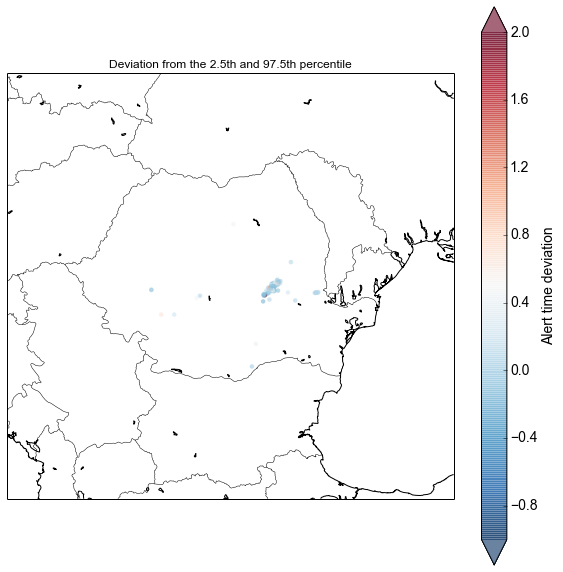

In [21]:
%run ./simulateat.py ./data/stations_ro.txt ./data/event_list_ro.csv \
./data/pick_delays_ro.txt ./data/env_delays_ro.txt \
./data/origin_creation_time_ro.npz \
./data/magnitude_estimation_delay.npz \
-o ./data/simulated_alert_times_ro.npz --maxdepth 200 \
--latmin 41 --lonmin 18.5 --latmax 50 --lonmax 32

### Optimal blind zone

tt: 100% |#####################################################| Time: 00:00:13
../delays/alerttimemap.py:88: RuntimeWarning: invalid value encountered in sqrt
  bz = np.sqrt(ttPmed * ttPmed * self.vs * self.vs - self.dep * self.dep)


No envelope delay data available for the following stations:

No pick delay info available for the following stations:



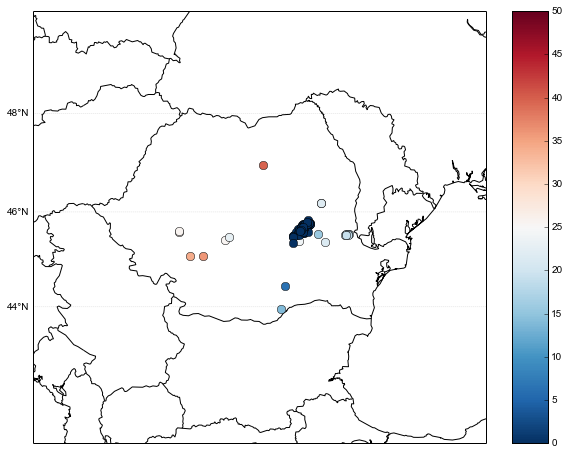

In [11]:
eventsfn = './data/event_list_romania.csv'
stationsfn = './data/stations_ro.txt'
fout = './data/optimal_blindzone_ro.npz'
plot_bz(events=eventsfn,stations=stationsfn,vmin=0,vmax=50,new=True,
        fout=fout,mapbnd=(41., 50., 18.5, 32., 45.5))

## Switzerland

### Pick delays

In [3]:
if True:
    %run ../../vssc3_scripts/vssc3_pick_delays.py --host seddba.ethz.ch \
    -u wwwuser -p www2uSer --port 5433 -d sc3dba \
    --dbtype postgresql --new \
    -o /tmp/single_station_pk_delays_ch.txt \
    --plotfile=/tmp/single_station_pk_delays_ch.png
else:
    fin = './data/pick_delays_ch.txt'
    plot_data_delays(fin)

### Envelope delays

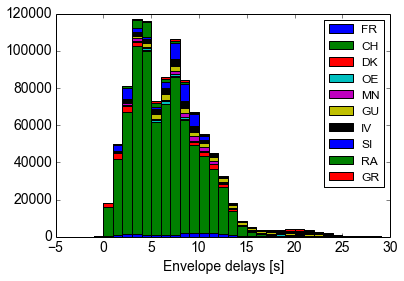

In [48]:
fin = './data/env_delays_ch.txt'
plot_data_delays(fin,label='Envelope delays [s]')

### Origin creation time

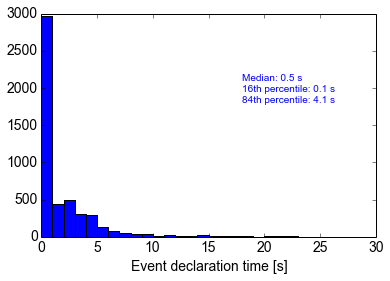

In [24]:
if False:
    %run ../delays/vssc3_origin_creation_time.py --host rzseddb.ethz.ch \
    -u wwwuser -p www2uSer --port 5434 -d zurichprodrz \
    --dbtype postgresql --new -o ./data/origin_creation_time_ch.npz \
    --plotfile=./data/origin_creation_time_ch.png
else:
    fin = './data/origin_creation_time_ch.npz'
    plot_origin_creation_time(fin)

### Simulate alert times

No envelope delay data available for the following stations:
IV.SALO IV.MDI NI.CGRP CH.OTER1 FR.OG02 NI.AGOR IV.VARE CH.SGT04 GU.CIRO
No pick delay info available for the following stations:

139 events analysed.
67.6% lie within the 16th and 84th percentile (94 events)
--> 12.9% are below the 16th percentile (18 events)
--> 19.4% are above the 84th percentile (27 events)
95.0% lie within the 2.5th and 97.5th percentile (132 events)
--> 5.0% are below the 2.5th percentile (7 events)
--> 0.0% are above the 97.5th percentile (0 events)


tt: 100% |#####################################################| Time: 00:00:27


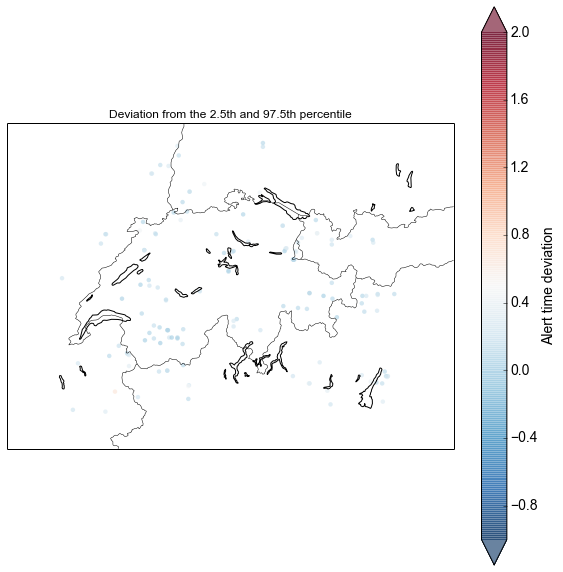

In [22]:
%run ./simulateat.py ./data/stations_ch.txt ./data/event_list_ch.csv \
./data/pick_delays_ch.txt ./data/env_delays_ch.txt \
./data/origin_creation_time_ch.npz \
./data/magnitude_estimation_delay.npz \
-o ./data/simulated_alert_times_ch.npz \
--latmin 45 --lonmin 5 --latmax 48.5 --lonmax 12

### Optimal blind zone

No envelope delay data available for the following stations:

No pick delay info available for the following stations:



tt: 100% |#####################################################| Time: 00:00:24


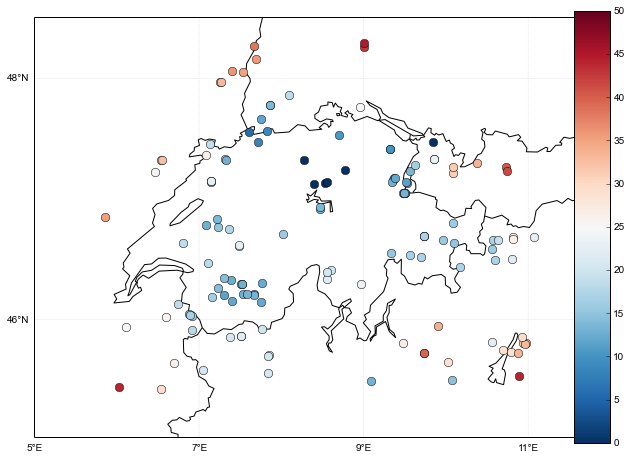

In [12]:
eventsfn = './data/event_list_ch.csv'
stationsfn = '../database/data/stations_ch.txt'
fout = './data/optimal_blindzone_ch.npz'
plot_bz(events=eventsfn,stations=stationsfn,vmin=0,vmax=50,new=True,
        fout=fout,mapbnd=(45, 48.5, 5, 12, 47))

## Iceland

### Pick delays

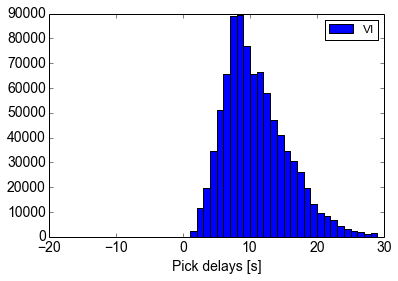

In [25]:
fin = './data/pick_delays_is.txt'
plot_data_delays(fin)

### Origin creation time

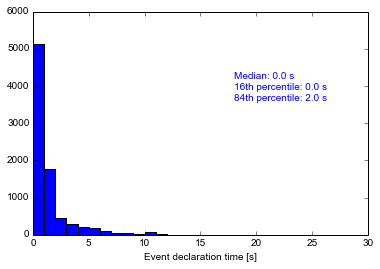

In [5]:
fin = './data/origin_creation_time_Iceland.npz'
plot_origin_creation_time(fin,fout=None)

### Optimal blind zone

No envelope delay data available for the following stations:

No pick delay info available for the following stations:



tt: 100% |#####################################################| Time: 00:02:39


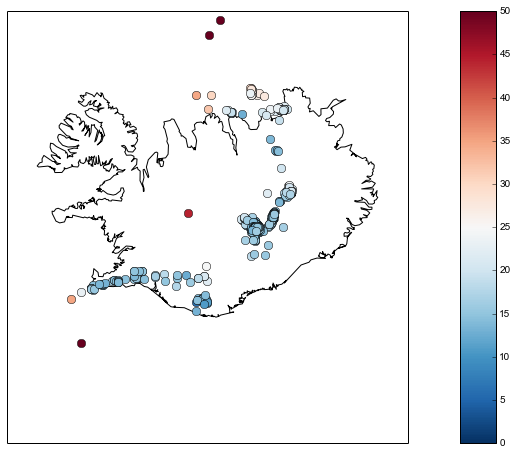

In [11]:
eventsfn = './data/event_list_iceland_all.csv'
stationsfn = './data/stations_is.txt'
fout = './data/optimal_blindzone_is.npz'
plot_bz(events=eventsfn,stations=stationsfn,vmin=0,vmax=50,new=True,
        fout=fout,mapbnd=(61.5, 67.5, -25.5, -12.5, 64.5))

## Greece

### Pick delays

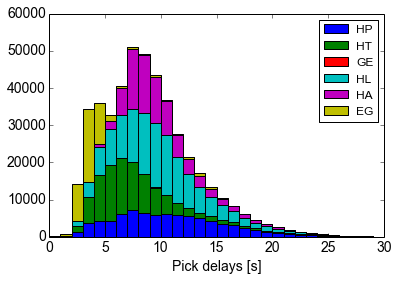

In [11]:
fin = './data/pick_delays_gr.txt'
plot_data_delays(fin,xmin=0,xmax=30)

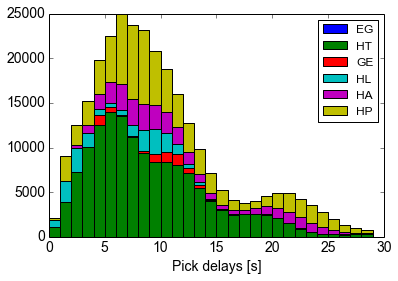

In [8]:
fin = './data/env_delays_gr.txt'
plot_data_delays(fin,fout='./plots/env_delays_gr.png',
                 xmin=0,xmax=30)

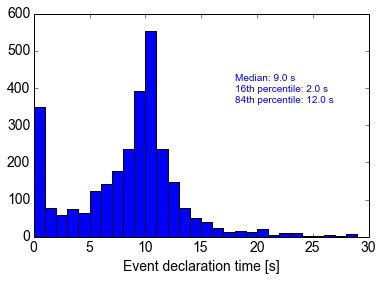

In [10]:
fin = './data/origin_creation_time_gr.npz'
plot_origin_creation_time(fin,fout=None)

### Optimal blind zone

No envelope delay data available for the following stations:

No pick delay info available for the following stations:



tt: 100% |#####################################################| Time: 00:03:32


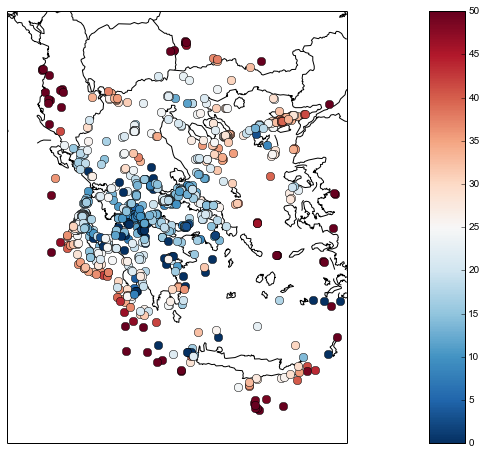

In [14]:
eventsfn = './data/event_list_patras.csv'
stationsfn = './data/stations_gr.txt'
fout = './data/optimal_blindzone_gr.npz'
plot_bz(events=eventsfn,stations=stationsfn,vmin=0,vmax=50,new=True,
        fout=fout,mapbnd=(33.5, 42.5, 18.5, 27.5, 39))

## New Zealand

### Pick delays

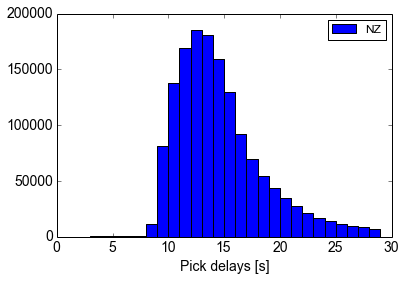

In [52]:
if False:
    # ssh -N -L 9996:localhost:5432 -l eewvs vseis-test.ethz.ch
    %run ../../vssc3_scripts/vssc3_pick_delays.py --host 127.0.0.1 \
    -u seiscomp3 -p birkidollar5s --port 9996 -d newzealand \
    --dbtype postgresql --pickmethod 'AIC' --new \
    -o /tmp/single_station_pk_delays_nz.txt \
    --plotfile=/tmp/single_station_pk_delays_nz.png
else:
    fin = './data/pick_delays_nz.txt'
    plot_data_delays(fin, xmin=0, xmax=30,
                     fout='./plots/pick_delays_nz.png')

### Envelope delays

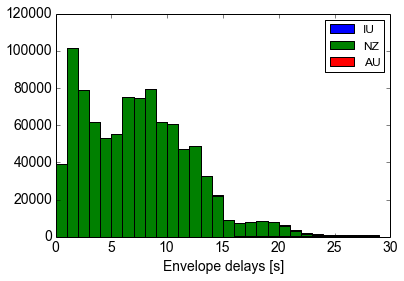

In [53]:
fin = './data/env_delays_nz.txt'
plot_data_delays(fin,label='Envelope delays [s]',
                 fout='./plots/env_delays_nz.png')

### Origin creation time

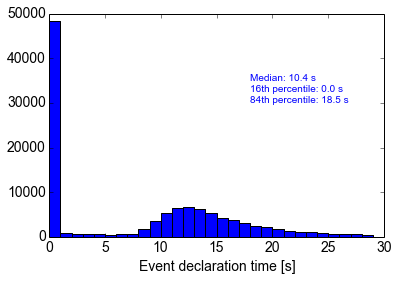

In [55]:
if False:
    %run ../delays/vssc3_origin_creation_time.py --host localhost \
    -u seiscomp3 -p birkidollar5s --port 9996 -d newzealand \
    --dbtype postgresql --new -o /tmp/origin_creation_time_nz.npz \
    --plotfile=/tmp/origin_creation_time_nz.png
else:
    fin = './data/origin_creation_time_nz.npz'
    plot_origin_creation_time(fin, fout='./plots/origin_creation_time_nz.png')

### Magnitude

MLv: Local magnitude calculated on the vertical component using a correction term to fit with the standard ML. The maximum distance for which this is computed is 8 degrees.

Mw(mB): Estimation of the moment magnitude Mw based on mB using the Mw vs. mB regression of Bormann and Saul (2008). The minimum distance for which this is computed is 5 degrees.


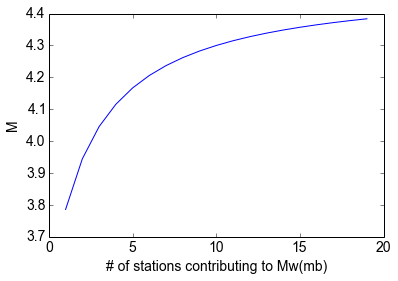

In [14]:
nst_Mw = arange(1,20)
Mlv = 4
Mw = 4.5
M = (2 * Mlv + (0.4 * nst_Mw - 1) * Mw) / (2 + (0.4 * nst_Mw) - 1)
plot(nst_Mw,M)
xlabel('# of stations contributing to Mw(mb)')
ylabel('M')
savefig('plots/magnitudes_NZ.png',bbox_inches='tight',dpi=300)

### Simulate alert times

44.3% lie within the 16th and 84th percentile
--> 46.7% are below the 16th percentile
--> 9.1% are above the 84th percentile
62.9% lie within the 2.5th and 97.5th percentile
--> 30.4% are below the 2.5th percentile
--> 6.7% are above the 97.5th percentile


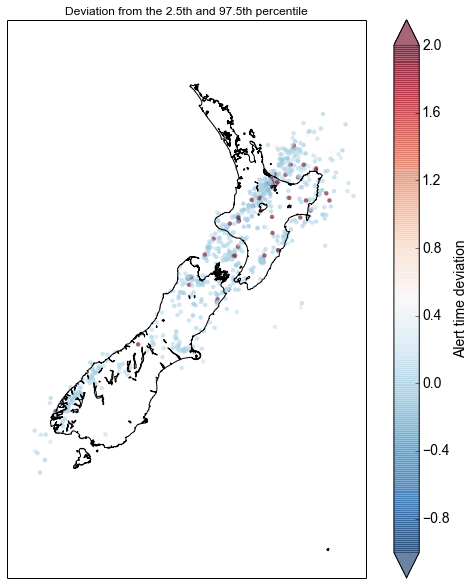

In [12]:
%run ./simulateat.py ./data/stations_nz.txt ./data/event_list_nz.csv \
./data/pick_delays_nz.txt ./data/env_delays_nz.txt \
./data/origin_creation_time_nz.npz \
./data/magnitude_estimation_delay.npz -a \
-o ./data/simulated_alert_times_nz.npz \
--latmin -50.5 --lonmin 164.5 --latmax -32 --lonmax 180.5

### Optimal blind zone

tt: 100% |#####################################################| Time: 00:02:28
../delays/alerttimemap.py:88: RuntimeWarning: invalid value encountered in sqrt
  bz = np.sqrt(ttPmed * ttPmed * self.vs * self.vs - self.dep * self.dep)


No envelope delay data available for the following stations:

No pick delay info available for the following stations:



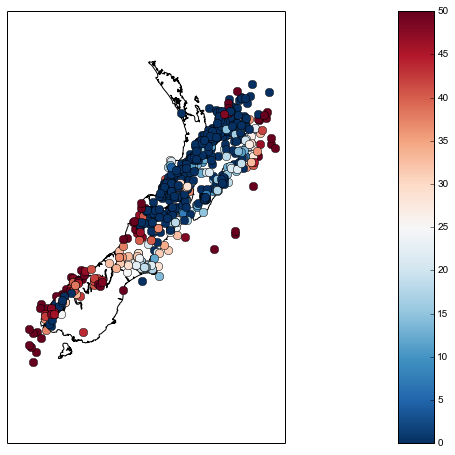

In [2]:
eventsfn = './data/event_list_nz.csv'
stationsfn = './data/stations_nz.txt'
fout = './data/optimal_blindzone_nz.npz'
plot_bz(events=eventsfn,stations=stationsfn,vmin=0,vmax=50,new=True,
        fout=fout,mapbnd=(-50.5, -32., 164.5, 180.5, -41.25))

## California

### Pick delays

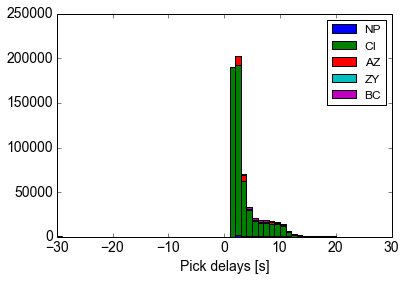

In [38]:
if False:
    # Pick delay analysis for Romania
    # ssh -N -L 9995:localhost:5432 -l sysop eew-vs.gps.caltech.edu
    %run ../../vssc3_scripts/vssc3_pick_delays.py --host 127.0.0.1 \
    -u seiscomp3 -p birkidollar5s --port 9995 -d seattlecaltech \
    --dbtype postgresql --new \
    -o /tmp/single_station_pk_delays_ca.txt \
    --plotfile=/tmp/single_station_pk_delays_ca.png \
    --start "2014-11-01T00:00:00" 
else:
    fin = './data/pick_delays_ca.txt'
    plot_data_delays(fin)
    

### Envelope delays

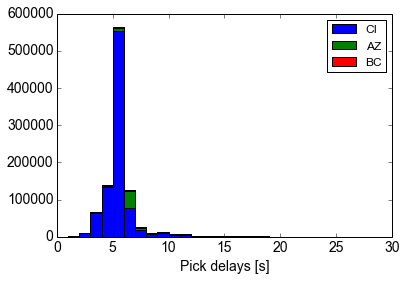

In [37]:
fin = './data/env_delays_ca.txt'
plot_data_delays(fin)

### Origin creation time

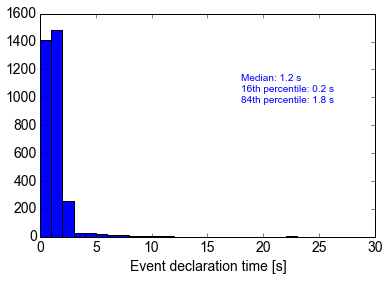

In [40]:
if False:
    %run ../delays/vssc3_origin_creation_time.py --host localhost \
    -u seiscomp3 -p birkidollar5s --port 9995 -d seattlecaltech \
    --dbtype postgresql --new -o /tmp/origin_creation_time_ca.npz \
    --plotfile /tmp/origin_creation_time_ca.png \
    --start "2014-11-01T00:00:00"
else:
    fin = './data/origin_creation_time_ca.npz'
    plot_origin_creation_time(fin)

### Simulated alert times

No envelope delay data available for the following stations:
CI.WMF CI.WRV2 CI.JRC2 CI.WVP2 CI.MPM CI.WCH CI.TEJ CI.WOF CI.TJR CI.THC CI.YUC CI.RMR CI.CPX CI.UABX CI.EMS CI.SJX CI.USB CI.EOC CI.CFD CI.CHI CI.YMD CI.RCT CI.VOG CI.VVD CI.5480 CI.NEN CI.BAI CI.SLM CI.QUG CI.LEO CI.WNM CI.HWB CI.LVA2 CI.PGA CI.TRO CI.FRD CI.PFO CI.SND CI.BZN CI.FUR CI.IDQ CI.THM CI.5444 CI.WBM CI.5062 CI.CLI CI.5271 CI.FRK CI.CBX CI.CCX CI.MGD CI.RMX CI.TKX CI.SPX CI.SFX CI.GSC CI.SHO CI.ALV CI.WSH CI.FLS CI.WMC CI.CBK CI.286 CI.TPM CI.HDB CI.RMM CI.RDM CI.IDY CI.KNW CI.CRY CI.BAC CI.SIL CI.BTL CI.5442 CI.MONP2 CI.COK2 CI.35342 CI.35078 CI.YEG CI.SS2 CI.SUN CI.BFS CI.FON CI.CZN CI.TPC CI.CVW CI.FRM CI.ABL CI.RYS CI.LEV CI.OLP CI.CFS CI.HLN CI.RSB CI.CFT CI.BUE CI.OGC CI.FUL CI.CRN CI.SAN CI.SKY CI.VLY CI.MOR CI.SMER CI.RINB CI.NOT CI.PTD CI.AGO CI.5081 CI.SMV CI.FMO CI.5403 CI.SQC CI.SMW CI.XTL CI.PEM CI.36014 CI.BCH CI.TJX CI.SHE CI.LVY CI.MIS CI.LBW1 CI.LBW2 CI.5492 CI.PUT CI.5499 CI.5402 CI.MTRP CI.CPE 

tt: 100% |#####################################################| Time: 00:03:23


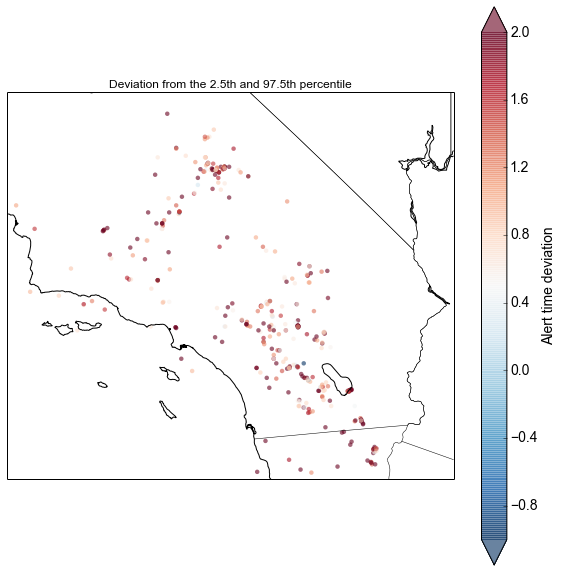

In [26]:
%run ./simulateat.py ./data/stations_ca.txt ./data/event_list_ca.csv \
./data/pick_delays_ca.txt ./data/env_delays_ca.txt \
./data/origin_creation_time_ca.npz \
./data/magnitude_estimation_delay.npz \
-o ./data/simulated_alert_times_ca.npz \
--latmin 32 --lonmin -121 --latmax 37 --lonmax -114

### Network density

The minimum alert time is:  1.30198921013


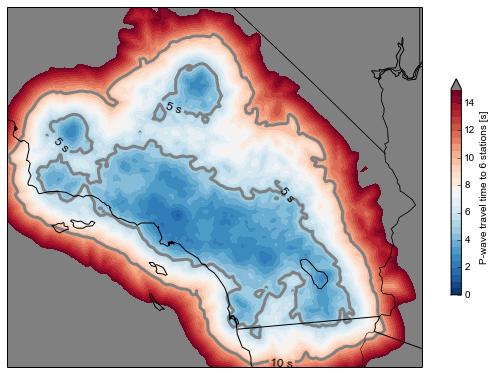

In [11]:
sys.path.append('../delays')
from alerttimemap import AlertTimeMap
from delayeew import DelayEEW
from optimal_blindzone import NetworkInfo

stationsfn = './data/stations_ca.txt'
resultsfn = './data/ptt_ca_6stations.npz'
ni = NetworkInfo()
ni.read(stationsfn)

lat = np.linspace(32, 37, 201)
lon = np.linspace(-121, -114, 201)
dep = np.array([8.0])
mlat, mlon, mdep = np.meshgrid(lat, lon, dep)
if False:
    de = DelayEEW()
    de.compute(ni, mlon, mlat, mdep, vp=6.5, vs=3.5, nnst=6,
               procdelay=False, target=None, nmaps=1,
               resultsfn=resultsfn, vp3d=False)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0.08, 0.05, 0.8, 0.5])
at = AlertTimeMap(resultsfn=resultsfn, mapbox=(32, 37, -121, -114, 36),
                  ax=ax)
m = at.plot2D(fig, ax, scale=True, geofilter=None, clevels=[5, 10],
              cbshrink=0.6, nnst=6)

### Current blind zone

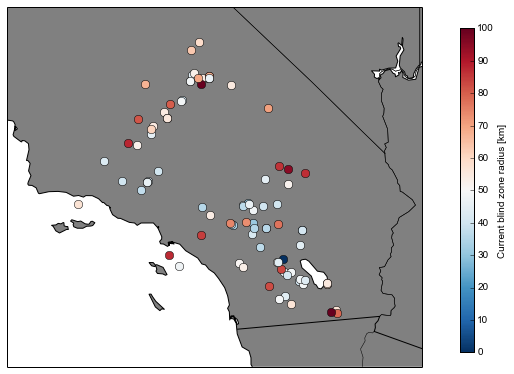

In [2]:
eventsfn = './data/event_list_ca.csv'
stationsfn = './data/stations_ca.txt'
fout = './data/optimal_blindzone_ca.npz'
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0.08,0.05,0.8,0.5])
cax = fig.add_axes([0.82, 0.07, 0.02, 0.45])
am, cb = plot_bz(events=eventsfn,stations=stationsfn,vmin=0,vmax=100,new=False,
        fout=fout,mapbnd=(32, 37, -121, -114, 36),geofilter=EventSoCal(),
        fig=fig,ax=ax,cax=cax,at=True,bzreduction=False)
am.m.drawmeridians(np.arange(33,37), labels=[0, 0, 0, 1], color='lightgray',
                   linewidth=0.5, zorder=0)
am.m.drawparallels(np.arange(-124,-114), labels=[1, 0, 0, 0], color='lightgray',
                   linewidth=0.5, zorder=0)
am.m.fillcontinents('gray', zorder=0)
cb.set_label('Current blind zone radius [km]')
fig.savefig('./plots/current_blind_zone_ca.png',dpi=300,bbox_inches='tight')
plt.show()

### Optimal blind zone

tt: 100% |#####################################################| Time: 00:02:06


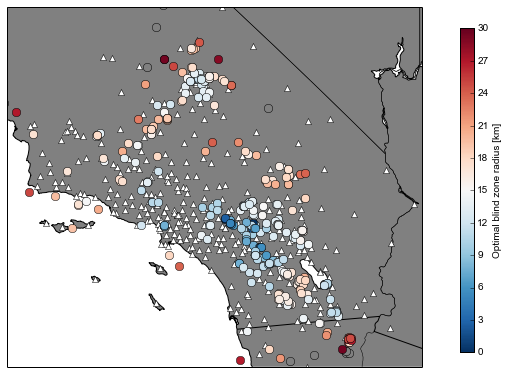

In [51]:
eventsfn = './data/event_list_ca.csv'
stationsfn = './data/stations_ca.txt'
fout = './data/optimal_blindzone_ca.npz'
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0.08,0.05,0.8,0.5])
cax = fig.add_axes([0.82, 0.07, 0.02, 0.45])
am, cb = plot_bz(events=eventsfn,stations=stationsfn,vmin=0,vmax=30,new=True,
        fout=fout,mapbnd=(32, 37, -121, -114, 36),
        fig=fig,ax=ax,cax=cax,at=False, bzreduction=False)
am.m.drawmeridians(np.arange(33,37), labels=[0, 0, 0, 1], color='lightgray',
                   linewidth=0.5, zorder=0)
am.m.drawparallels(np.arange(-124,-114), labels=[1, 0, 0, 0], color='lightgray',
                   linewidth=0.5, zorder=0)
am.m.fillcontinents('gray', zorder=0)
cb.set_label('Optimal blind zone radius [km]')
fig.savefig('./plots/optimal_blind_zone_ca.png',dpi=300,bbox_inches='tight')
plt.show()

### Blind zone reduction

No envelope delay data available for the following stations:

No pick delay info available for the following stations:



tt: 100% |#####################################################| Time: 00:01:51


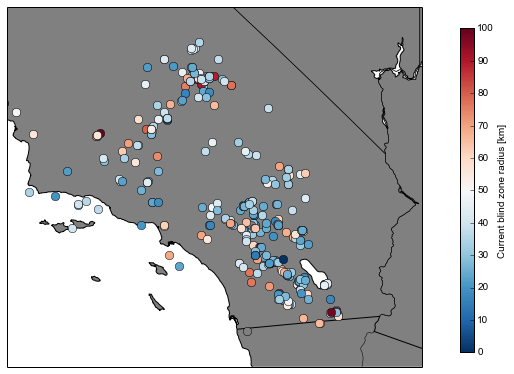

In [45]:
eventsfn = './data/event_list_ca.csv'
stationsfn = './data/stations_ca.txt'
fout = './data/optimal_blindzone_ca.npz'
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0.08,0.05,0.8,0.5])
cax = fig.add_axes([0.82, 0.07, 0.02, 0.45])
am, cb = plot_bz(events=eventsfn,stations=stationsfn,vmin=0,vmax=100,new=True,
        fout=fout,mapbnd=(32, 37, -121, -114, 36),geofilter=EventSoCal(),
        fig=fig,ax=ax,cax=cax,bzreduction=True,at=False)
am.m.drawmeridians(np.arange(33,37), labels=[0, 0, 0, 1], color='lightgray',
                   linewidth=0.5, zorder=0)
am.m.drawparallels(np.arange(-124,-114), labels=[1, 0, 0, 0], color='lightgray',
                   linewidth=0.5, zorder=0)
am.m.fillcontinents('gray', zorder=0)
cb.set_label('Current blind zone radius [km]')
fig.savefig('./plots/blind_zone_reduction_ca.png',dpi=300,
            bbox_inches='tight')
plt.show()